In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os
import sys
sys.path.append('..')
from edfreader import read_edf
import numpy as np

# Maching Pursuit

In [2]:
def fct_MP (signaux, phi_i, seuil) :
    r_t = signaux
    
    liste_i = []
    liste_c = []
    liste_a = []
    liste_phi = []
    liste_a_phi = []
    liste_norm_rt = []
    liste_rt =[]
    po = 100
    liste_norm_rt.append(po)
    while po > seuil : #np.linalg.norm(r_t) > seuil  :
        c_i=[]
        c_abs = []
        for i in range(np.shape(phi_i)[0]) :
            c_i.append(np.vdot(r_t,phi_i[i]))
            c_abs.append(abs(np.vdot(r_t,phi_i[i])))

        i_star = np.argmax(c_abs)        
        a_i = c_i[i_star]/((np.linalg.norm(phi_i[i_star]))**2)
        r_t = r_t - (a_i*phi_i[i_star])
       
        liste_i.append(i_star)
        liste_c.append(c_i[i_star])
        liste_a.append(a_i)
        liste_phi.append(phi_i[i_star])
        liste_a_phi.append(a_i*phi_i[i_star])
        #liste_norm_rt.append(np.linalg.norm(r_t))
        liste_rt.append(r_t)
        po = np.linalg.norm(r_t)*100 / np.linalg.norm(signaux)
        liste_norm_rt.append(po)
        
    return r_t, liste_i, liste_c, liste_a, liste_phi, liste_a_phi, liste_norm_rt, liste_rt

In [3]:
def plot_fig (signaux, r, aphi, phi, norm_r):
    fig, axs = plt.subplots(4, 1, figsize=(fig_width, fig_width/1.6180))

    axs[0].plot(range(2106), signaux, c='k')
    axs[0].plot(range(2106), r, c='r')
    axs[0].plot(range(2106), sum(aphi)+r, c='k')

    for x in range(np.shape(phi)[0]) :
        axs[1].plot(range(2106), phi[x])
        axs[2].plot(range(2106), aphi[x])
    axs[3].plot(norm_r, c='k')
    axs[3].yaxis.set_ticks(range(0, 101, 20))

## données

In [4]:
timeStr = '2017-07-21_142241'
observer = 'laurent'
mode = 'enregistrement'

In [5]:
file = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')
      
resultats = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.asc')
data = read_edf(resultats, 'TRIALID')

In [6]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']

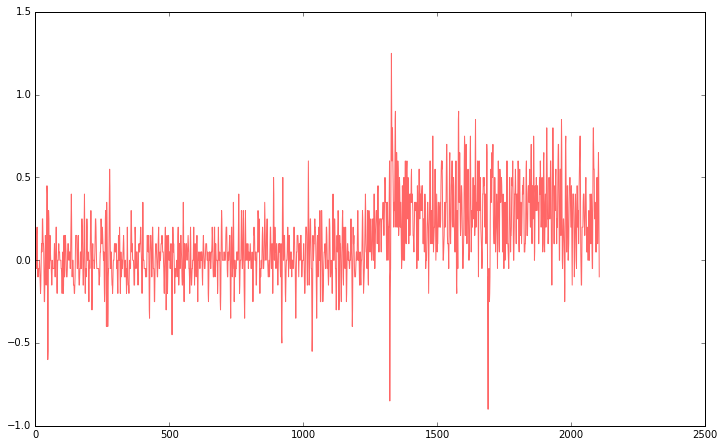

In [7]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
block = 0    
trial = 0

trial_data = trial + N_trials*block

data_x = data[trial_data]['x']
data_y = data[trial_data]['y']
trackertime = data[trial_data]['trackertime']

TargetOn = data[trial_data]['events']['msg'][15][0]

saccades = data[trial_data]['events']['Esac']

start = TargetOn

trackertime = trackertime - start
trackertime_0 = data[trial_data]['trackertime'][0]

gradient_x = np.gradient(data_x)

# SUPPRESSION DES SACCADES
new_gradient_x=[]
new_time=[]
t=0
for x_data in range(len(data_x)):
    saccade = None
    for s in range(len(saccades)) :
        if x_data in np.arange((saccades[s][0]-trackertime_0), (saccades[s][1]-trackertime_0+1+4)) :
            saccade = 'yes'
    if not saccade :
        new_gradient_x.append(gradient_x[x_data])
        new_time.append(t)
        t = t+1
    saccade = None

axs.plot(new_gradient_x, color='r', alpha=0.6)

In [8]:
print (np.shape(new_gradient_x))

(2106,)


## dictionnaire random

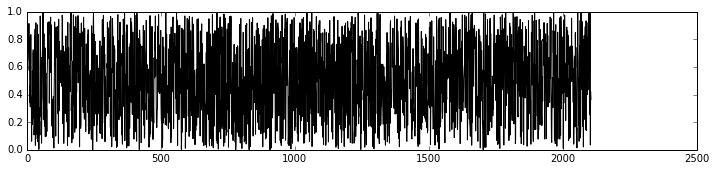

In [9]:
dic_phi_rand = np.random.rand(10000, 2106)

fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/3)/1.6180))
axs.plot(range(2106), dic_phi_rand[0, :], c='k')

4425


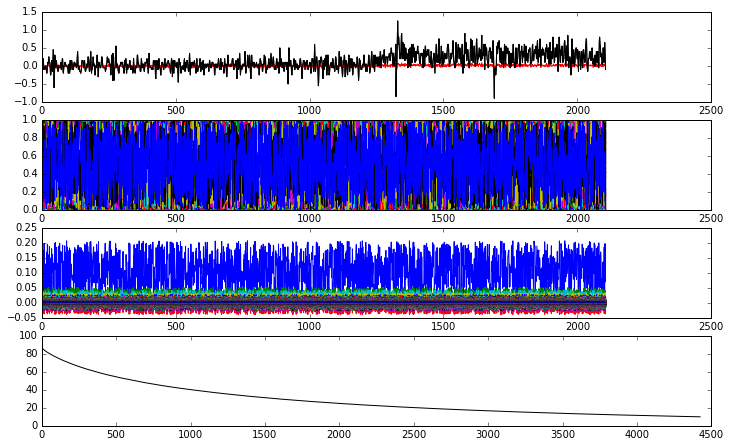

In [10]:
seuil = 10

r, i, c, a, phi, aphi, norm_r, liste_rt = fct_MP (new_gradient_x, dic_phi_rand, seuil)
print (np.shape(i)[0])

plot_fig (new_gradient_x, r, aphi, phi, norm_r)